In [28]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import random, scipy
from ifitpy import Fitter
from ifitpy import Functions
from ifitpy import Utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
f = Fitter("linear") #linear, expo, gaussian, gaussian2d, poly

# This fit package permits to, well, fit a given x,y data. It encapsulates both iminuit and curve_fit. 
# There are two type of functions. Simple (linear, expo) and Complex(gaussian, gaussian2d, poly).

# For Simple function fit(x,y) are fit(x,y,p0) are valid inputs. 
# In the first option the fit attempts to estimate the initial starting point 
# In the second option a list of parameters (p0) is used to innitilized the fit

# For Complex functions fit(x,y, n) are fit(x,y,p0) are valid inputs. 
# If n us used then the algorithm will use this value to generate the fitting function with n components
# For example, fit(xx,yy,n=3) will fit a sum of two gaussian(2d) or a 3-degree polinom. And p0 zero is also estimated.
# If fit(x,y,n,p0) p0 will be the innitialization parameters. Note that len(p0) = n*parameters_to_fit.

#There's also a f.fitBinned(xx,yy,bins=50) option which allows to fit a profile histogram instead of the raw data.
#This option is often faster and the recomended one as it takes into account the statistical fluctuation of the data.

#To extract the fit results use

f.fit([0,10], [0,-10])
p = f.getParams()
print(p) # prints a string with the available variables.
print(p.vars) # list of the results
print(p.m) # slope for the "linear" type
print(p.b) # slope for the "intercept" type

#Use f.evaluate(xx) to evaluate the function, like for plotting and such
print(f.evaluate([20]))

vars: [-1.0, 0.0], m: -1.0, b: 0.0
[-1.0, 0.0]
-1.0
0.0
[-20.]


/home/guilherme/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


<IPython.core.display.Javascript object>


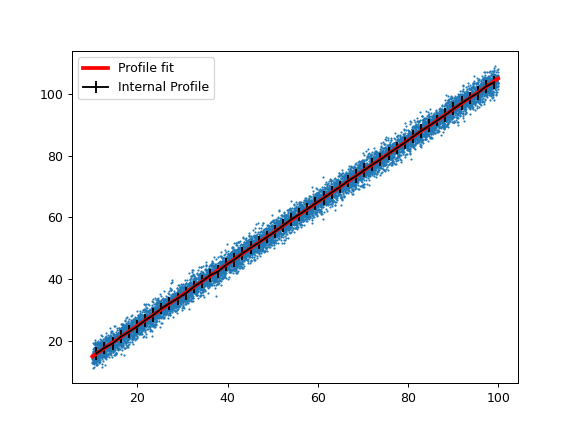

0.9983798858140798 5.074206000992902
Chi2 =  4.043493184703073e+18
0.9984529661667729 5.073304227243997
Chi2 =  0.004422300010655611


In [8]:
m, b = 1,0
xx = np.arange(10,100,0.01)
yy = xx*m+b + np.random.normal(5, 2, size = xx.shape)


fig = plt.figure()
plt.scatter(xx, yy,s=0.5)

f = Fitter("linear")
f.fit(xx,yy)
p = f.getParams()
print(p.m,p.b)
print("Chi2 = ",f.chi2/f.dof)

plt.plot(xx, xx*p.m+p.b, c="orange")


f = Fitter("linear")
f.fitBinned(xx,yy,bins=50)
p = f.getParams()
print(p.m,p.b)
print("Chi2 = ",f.chi2/f.dof)

plt.errorbar(f.profx, f.profy, yerr=f.profyrr, c="black", label="Internal Profile")
plt.plot(xx,f.evaluate(xx), c="red", label="Profile fit", lw=3)
plt.legend()

<IPython.core.display.Javascript object>


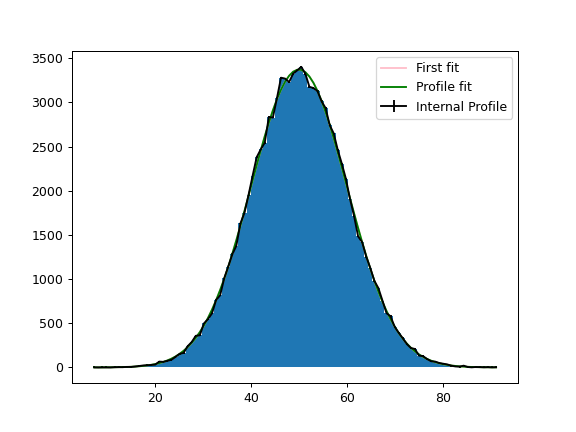

Chi2 =  1.1467826282433781e+21
[3372.4921256382945, 49.998695487697205, -9.991528230691033]
2: Chi2 =  11.420870214135793
vars: [3372.100373013616, 49.99988099935502, -9.991151620226884], amp: 3372.100373013616, mean: 49.99988099935502, sigma: -9.991151620226884
Mean is:  49.99988099935502
Sigma is:  -9.991151620226884
Amplitude is:  3372.100373013616
[3372.100373013616, 49.99988099935502, -9.991151620226884]


In [117]:
mu, sig = 50,10
yyt = np.random.normal(mu, sig, size = 100000)

fig = plt.figure()
res = plt.hist(yyt, bins=100)

yy = res[0]
xx = (res[1][:-1]+res[1][1:])*0.5

f = Fitter("gaussian")
f.fit(xx, yy)
plt.plot(xx,f.evaluate(xx), c="pink", label="First fit")

p = f.getParams()
print("Chi2 = ",f.chi2/f.dof)
print(p.vars)



f = Fitter("gaussian")
f.fitBinned(yyt,bins=100)
p = f.getParams()
print("2: Chi2 = ",f.chi2/f.dof)
print(p)
print("Mean is: ", p.mean)
print("Sigma is: ", p.sigma)
print("Amplitude is: ", p.amp)
print(p.vars)

plt.errorbar(f.profx, f.profy, yerr=f.profyrr, c="black", label="Internal Profile")
plt.plot(xx,f.evaluate(xx), c="green", label="Profile fit")

plt.legend()

<IPython.core.display.Javascript object>


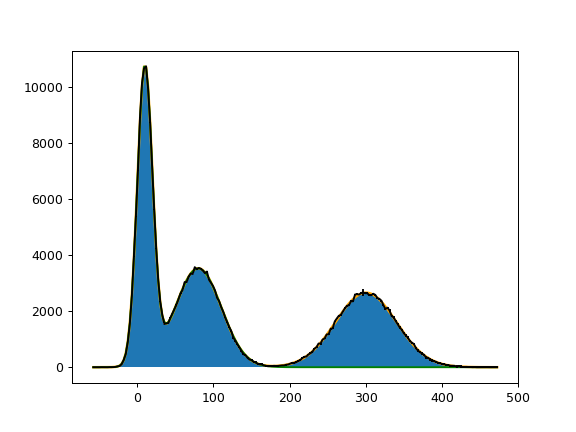

<ValueView x0=10563.618432931813 x1=9.9795035333788 x2=10.059147914314387 x3=3529.553049176978 x4=80.04977298430141 x5=-30.124822738009403 x6=2657.6032446931868 x7=300.09215776075786 x8=-39.97160322797038>
vars: [10563.618432931813, 9.9795035333788, 10.059147914314387, 3529.553049176978, 80.04977298430141, -30.124822738009403, 2657.6032446931868, 300.09215776075786, -39.97160322797038], amp_0: 10563.618432931813, mean_0: 9.9795035333788, sigma_0: 10.059147914314387, amp_1: 3529.553049176978, mean_1: 80.04977298430141, sigma_1: -30.124822738009403, amp_2: 2657.6032446931868, mean_2: 300.09215776075786, sigma_2: -39.97160322797038
Chi2 =  809.8173698508949
vars: [10561.0055439832, 9.974184387776914, -10.053472259273375, -4588.427007129833, -750.3896124974958, 182.7665652819382, 3524.1865621952907, 80.08635878782054, 30.252569769306966], amp_0: 10561.0055439832, mean_0: 9.974184387776914, sigma_0: -10.053472259273375, amp_1: -4588.427007129833, mean_1: -750.3896124974958, sigma_1: 182.766

<ErrorbarContainer object of 3 artists>

In [116]:
f = Fitter("gaussian")

mu, sig = 20,10
m2 = np.array(np.random.normal(10, 10, size = 100000))
m1 = np.array(np.random.normal(80, 30, size = 100000))
m3 = np.array(np.random.normal(300, 40, size = 100000))

yyt = np.concatenate((m2, m1,m3))
fig = plt.figure()

res = plt.hist(yyt, bins=200)
yy = res[0]
xx = (res[1][:-1]+res[1][1:])*0.5

f.fit(xx,yy,n=3)
p = f.getParams()
print(f.par)
print(p)
plt.plot(xx,f.evaluate(xx), c="orange", lw=2)


f = Fitter("gaussian")
f.fitBinned(yyt,bins=200,n=3)
p = f.getParams()
print("Chi2 = ",f.chi2/f.dof)
print(p)
plt.plot(xx,f.evaluate(xx), c="green", label="Profile fit")
plt.errorbar(f.profx, f.profy, yerr=f.profyrr, c="black", label="Internal Profile")

<IPython.core.display.Javascript object>


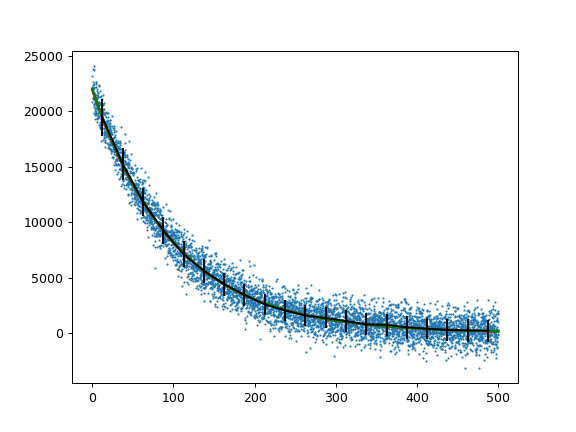

<ValueView p0=9.996642064370528 p1=-0.009909876231244877>
vars: [9.996642064370528, -0.009909876231244877], p0: 9.996642064370528, p1: -0.009909876231244877
vars: [9.999315655683288, -0.009909625769660162], p0: 9.999315655683288, p1: -0.009909625769660162


<ErrorbarContainer object of 3 artists>

In [18]:
p0, p1 = 10, -0.01
xx = np.arange(0,500,0.1)
yy = np.exp(p0+p1*xx) +np.random.normal(50, 1000, size = xx.shape)

fig = plt.figure()
plt.scatter(xx, yy,s=0.5)


f = Fitter("expo")
f.fit(xx,yy)
p = f.getParams()
print(f.par)
print(p)
plt.plot(xx, f.evaluate(xx),color="r",lw=2)



f = Fitter("expo")
f.fitBinned(xx,yy,bins=20)
p = f.getParams()
print(p)
plt.plot(xx, f.evaluate(xx),color="g",lw=2)
plt.errorbar(f.profx, f.profy, yerr=f.profyrr, c="black", label="Internal Profile")

/tmp/ipykernel_375/2172772997.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  pts = numpy_2d([0, 0], cov, size=10000)


<IPython.core.display.Javascript object>


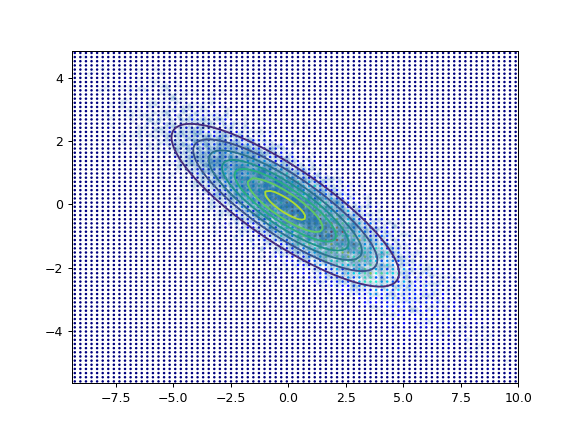

<ValueView x0=-0.12657340988811108 x1=-0.0309567736654317 x2=2.7029937599462412 x3=0.6414937945826983 x4=18.686351474900782 x5=0.4361427797913286>
vars: [-0.12657340988811108, -0.0309567736654317, 2.7029937599462412, 0.6414937945826983, 18.686351474900782, 0.4361427797913286], x0_0: -0.12657340988811108, y0_0: -0.0309567736654317, sigma_x_0: 2.7029937599462412, sigma_y_0: 0.6414937945826983, amp_0: 18.686351474900782, theta_0: 0.4361427797913286


In [96]:
numpy_2d = np.random.multivariate_normal
f = Fitter("gaussian2d")

cov = np.array([[6, -3], [-3, 1]])  # to generate our testing dataset
pts = numpy_2d([0, 0], cov, size=10000)
x,y = pts[:, 0], pts[:, 1]

fig2 = plt.figure()
plt.plot(x,y, '.', alpha=0.05)


xb, yb, zb, _,_,_ = Utils.profile2d(x,y)

plt.scatter(xb, yb, c=zb,s=1, cmap="jet")

f.fit(x,y)
p = f.getParams()
print(f.par)
print(p)


xg, yg = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
plt.contour(xg, yg, f.evaluate((xg, yg)))

s:  0 2
s:  1 2
[0.018068146790898642, 0.018068146790898642, 2.456771963091855, 2.456771963091855, 44.0, 0.1, 3.984982201812257, 3.984982201812257, 2.4265920627613284, 2.4265920627613284, 44.0, 0.1]
<ValueView x0=-0.07494123352792097 x1=-0.21546855819319502 x2=1.201828565431669 x3=2.8159661542949967 x4=30.995518846054853 x5=25637.559471432978 x6=3.8604732786023956 x7=3.7944643681953276 x8=3.8814300180842234 x9=2.3053036040828037 x10=12.069920567352618 x11=-54442.53999063887>
vars: [-0.07494123352792097, -0.21546855819319502, 1.201828565431669, 2.8159661542949967, 30.995518846054853, 25637.559471432978, 3.8604732786023956, 3.7944643681953276, 3.8814300180842234, 2.3053036040828037, 12.069920567352618, -54442.53999063887], x0_0: -0.07494123352792097, y0_0: -0.21546855819319502, sigma_x_0: 1.201828565431669, sigma_y_0: 2.8159661542949967, amp_0: 30.995518846054853, theta_0: 25637.559471432978, x0_1: 3.8604732786023956, y0_1: 3.7944643681953276, sigma_x_1: 3.8814300180842234, sigma_y_1: 2.

<IPython.core.display.Javascript object>


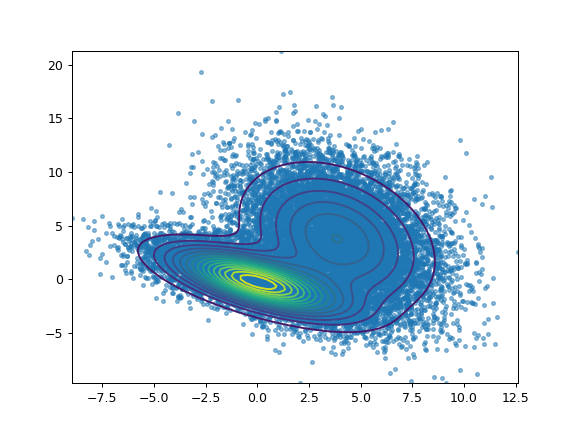

In [111]:
f = Fitter("gaussian2d")

numpy_2d = np.random.multivariate_normal  # to generate our testing dataset

cov = np.array([[6, -3], [-3, 3.5]])
cov1 = np.array([[6, -3], [-3, 15]])

pts =  np.concatenate((numpy_2d([0, 0], cov, size=10000)
                       ,numpy_2d([4, 4], cov1, size=10000)))
x,y = pts[:, 0], pts[:, 1]

f.fit(x,y,n=2)
p = f.getParams()
print(f.par)
print(p)
#print(p.sigma_y_1)

fig2 = plt.figure()
plt.plot(x,y, '.', alpha=0.5)


xg, yg = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
plt.contour(xg, yg, f.evaluate((xg, yg)), levels=20)

<ValueView x0=-0.1670034510984477 x1=-0.106593139493442 x2=2.7750460716660763 x3=1.2508023815735216 x4=31.706833416673025 x5=0.5951550649529749 x6=1.7759913021106524 x7=4.908386291892302 x8=1.2403365560101869 x9=2.821587351388385 x10=31.604401961094485 x11=-9931.562862739556 x12=14.847493603325677 x13=4.869857665953639 x14=-2.811257482708984 x15=-1.2271125736146236 x16=32.01779290788047 x17=-199003.60143398918>
vars: [-0.1670034510984477, -0.106593139493442, 2.7750460716660763, 1.2508023815735216, 31.706833416673025, 0.5951550649529749, 1.7759913021106524, 4.908386291892302, 1.2403365560101869, 2.821587351388385, 31.604401961094485, -9931.562862739556, 14.847493603325677, 4.869857665953639, -2.811257482708984, -1.2271125736146236, 32.01779290788047, -199003.60143398918], x0_0: -0.1670034510984477, y0_0: -0.106593139493442, sigma_x_0: 2.7750460716660763, sigma_y_0: 1.2508023815735216, amp_0: 31.706833416673025, theta_0: 0.5951550649529749, x0_1: 1.7759913021106524, y0_1: 4.9083862918923

<IPython.core.display.Javascript object>


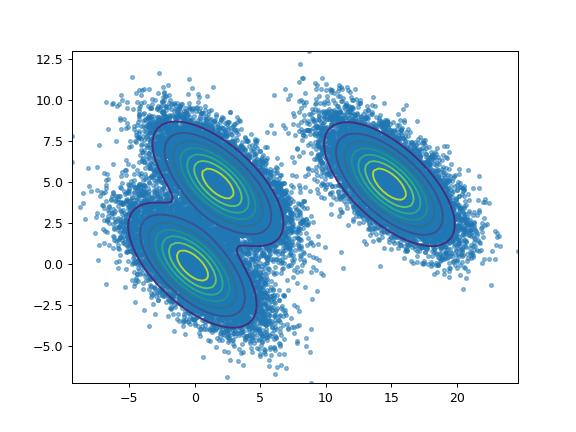

In [113]:
f = Fitter("gaussian2d")

numpy_2d = np.random.multivariate_normal # to generate our testing dataset

cov = np.array([[6, -3], [-3, 3.5]])
pts =  np.concatenate((numpy_2d([0, 0], cov, size=10000)
                       ,numpy_2d([2, 5], cov, size=10000)
                      ,numpy_2d([15, 5], cov, size=10000)))
x,y = pts[:, 0], pts[:, 1]

f.fit(x,y,n=3)
p = f.getParams()
print(f.par)
print(p)
print(p.sigma_x_2)
fig2 = plt.figure()
plt.plot(x,y, '.', alpha=0.5)

xg, yg = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
plt.contour(xg, yg, f.evaluate((xg, yg)))

(5000,)
<ValueView x0=9.922751077452293 x1=3.118526595139008 x2=-12.902482660128182>
vars: [9.922751077452293, 3.118526595139008, -12.902482660128182], a: 9.922751077452293, b: 3.118526595139008, c: -12.902482660128182
9.922751077452293


<IPython.core.display.Javascript object>


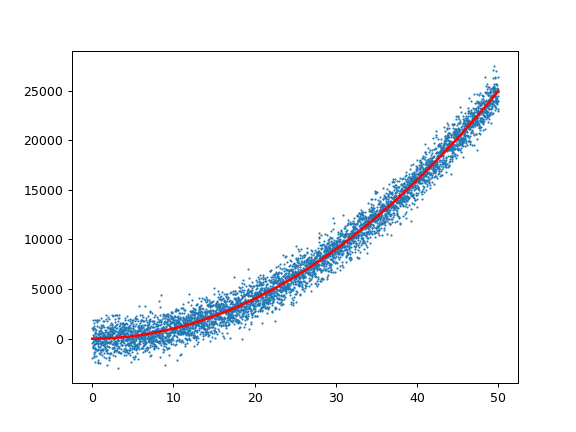

In [114]:
f = Fitter("poly")

p0, p1, p2 = 10, -0.01,3
xx = np.arange(0,50,0.01)

print(xx.shape)
yy = p0*xx**2+p1*xx+p2+np.random.normal(10, 1000, size = xx.shape)

f.fit(xx,yy,p0=3)
p = f.getParams()
print(f.par)
print(p)
print(p.a)

fig2 = plt.figure()

plt.scatter(xx, yy,s=0.5)
plt.plot(xx, f.evaluate(xx),color="r",lw=2)

(10000,)
<ValueView x0=-1.9543092128037307 x1=1.5301032330204276 x2=-83.44759580303176 x3=191.52240171378006>
vars: [-1.9543092128037307, 1.5301032330204276, -83.44759580303176, 191.52240171378006], a: -1.9543092128037307, b: 1.5301032330204276, c: -83.44759580303176, d: 191.52240171378006
-1.9543092128037307


<IPython.core.display.Javascript object>


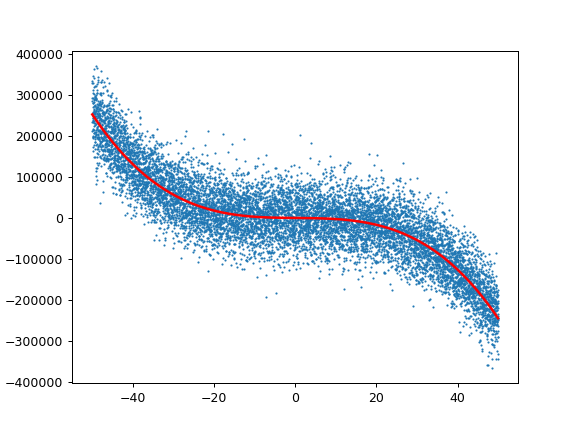

In [115]:
f = Fitter("poly")

p0, p1, p2,p3 = 2, -1,-1,-2
xx = np.arange(-50,50,0.01)

print(xx.shape)
yy = p3*xx**3+p0*xx**2+p1*xx+p2+np.random.normal(100, 50000, size = xx.shape)

f.fit(xx,yy,p0=4)
p = f.getParams()
print(f.par)
print(p)
print(p.a)

fig2 = plt.figure()

plt.scatter(xx, yy,s=0.5)
plt.plot(xx, f.evaluate(xx),color="r",lw=2)